# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     729.5
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           8.89e-39
Time:                        00:15:24   Log-Likelihood:                -5.4346
No. Observations:                  50   AIC:                             18.87
Df Residuals:                      46   BIC:                             26.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9046      0.096     51.166      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.37224707  4.86650554  5.32060737  5.70692305  6.00779443  6.21843589
  6.34772059  6.41672263  6.45525468  6.49696978  6.5738323   6.71086624
  6.92204387  7.20799015  7.55588002  7.94154553  8.33344656  8.6978528
  9.00438551  9.23100868  9.36764949  9.41785321  9.39820077  9.33558453
  9.26278995  9.21310904  9.21487054  9.28678566  9.43487379  9.65147362
  9.91650179 10.20075261 10.47069641 10.69398838 10.84478277 10.90797922
 10.88170375 10.77761662 10.61899661 10.43691635 10.26513719 10.13456232
 10.06815945 10.07718726 10.15934568 10.29915373 10.47049305 10.64089903
 10.77689469 10.84949083]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.82410784 10.66434675 10.39008904 10.04664216  9.69364662  9.39047393
  9.18169041  9.08614577  9.09235807  9.16132486]


## Plot comparison

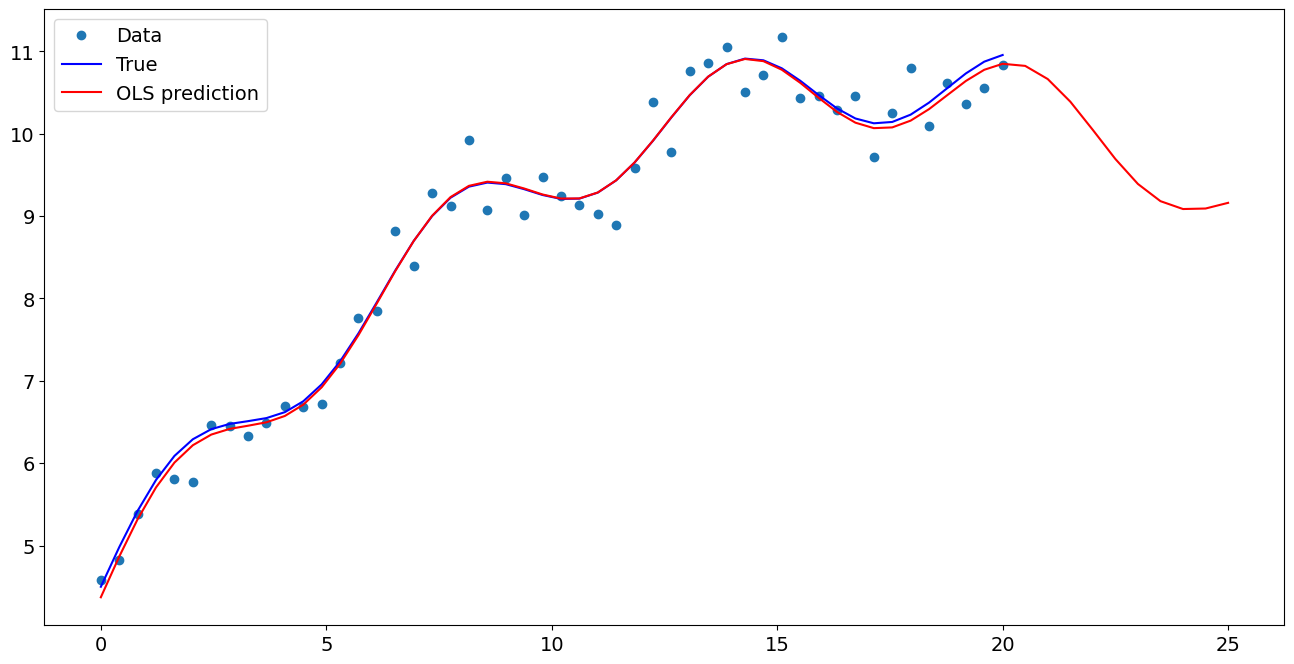

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.904613
x1                  0.513667
np.sin(x1)          0.506971
I((x1 - 5) ** 2)   -0.021295
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.824108
1    10.664347
2    10.390089
3    10.046642
4     9.693647
5     9.390474
6     9.181690
7     9.086146
8     9.092358
9     9.161325
dtype: float64